In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix

In [2]:
iris = sns.load_dataset('iris')

print(iris.tail())

     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica


In [3]:
# Check for missing values
print("Missing values in the dataset:\n", iris.isnull().sum())

Missing values in the dataset:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [4]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(iris['species'])
y_one_hot = to_categorical(y)

In [36]:
list(iris['species'])[50]

'versicolor'

In [34]:
y[50]

1

In [35]:
y_one_hot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [7]:
# Split the data into features and target variable
x = iris.drop('species', axis=1)

x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y_one_hot, test_size=0.3, random_state=42)

In [9]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5


In [10]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [11]:
y_train[0]

array([0., 1., 0.], dtype=float32)

In [12]:
y_test[0]

array([0., 1., 0.], dtype=float32)

In [13]:
# Feature scaling
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Print out the pre-processed data shapes
print("Training set shape:", x_train_scaled.shape)
print("Testing set shape:", x_test_scaled.shape)

input_dimension = x_train_scaled[1]

Training set shape: (105, 4)
Testing set shape: (45, 4)


In [14]:
# Define the neural network model
model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax')) 

2024-09-16 00:00:18.290149: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-16 00:00:18.290898: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [15]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
history = model.fit(x_train_scaled, y_train, 
                    epochs=200, 
                    batch_size=8, 
                    validation_split=0.1, 
                    verbose=1)

Epoch 1/200
12/12 [==============================] - 0s 5ms/step - loss: 0.5519 - accuracy: 0.8936 - val_loss: 0.6131 - val_accuracy: 0.8182
Epoch 2/200
12/12 [==============================] - 0s 3ms/step - loss: 0.5389 - accuracy: 0.8936 - val_loss: 0.6007 - val_accuracy: 0.8182
Epoch 3/200
12/12 [==============================] - 0s 3ms/step - loss: 0.5275 - accuracy: 0.8936 - val_loss: 0.5935 - val_accuracy: 0.8182
Epoch 4/200
12/12 [==============================] - 0s 3ms/step - loss: 0.5163 - accuracy: 0.8936 - val_loss: 0.5882 - val_accuracy: 0.8182
Epoch 5/200
12/12 [==============================] - 0s 3ms/step - loss: 0.5056 - accuracy: 0.8936 - val_loss: 0.5810 - val_accuracy: 0.8182
Epoch 6/200
12/12 [==============================] - 0s 3ms/step - loss: 0.4963 - accuracy: 0.9043 - val_loss: 0.5796 - val_accuracy: 0.8182
Epoch 7/200
12/12 [==============================] - 0s 3ms/step - loss: 0.4832 - accuracy: 0.9468 - val_loss: 0.5681 - val_accuracy: 0.8182
Epoch 8/200
1

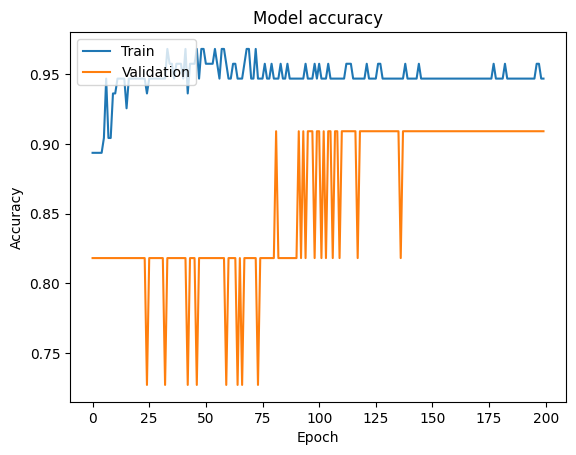

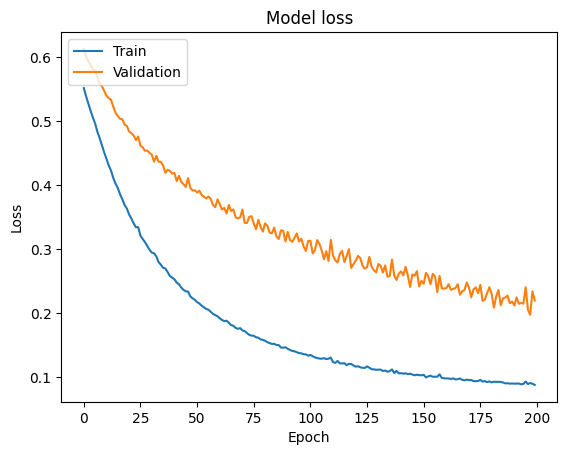

In [22]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

2/2 [==============================] - 0s 1ms/step


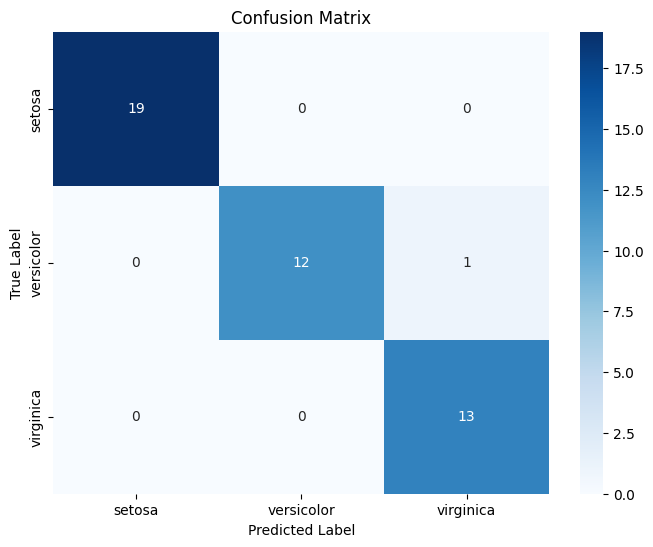

In [23]:
# Make predictions
y_pred = model.predict(x_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true_classes = np.argmax(y_test, axis=1)   # Convert true labels from one-hot encoding to class labels

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [24]:
x_test_scaled[0]

array([0.52941176, 0.36363636, 0.64285714, 0.45833333])

In [29]:
y_test[0]

array([0., 1., 0.], dtype=float32)